# Benchmark Fit-Performance of New Loss Module in Scikit-Learn

**Table of Contents** <a name="toc"></a>
- [1. LogisticRegression](#chapter_1)
- [2. HistGradientBoostingClassifier](#chapter_2)

#### Background
https://github.com/scikit-learn/scikit-learn/pull/20567 introduced a new private loss function module in scikit-lean.

Benchmark scripts "bench_loss_module_hgbt.py" and "bench_loss_module_logistic.py" are run once on master ([commit d09e1d72399a7ed558cf7ced1f5a26caf674e3fc](https://github.com/scikit-learn/scikit-learn/commit/d09e1d72399a7ed558cf7ced1f5a26caf674e3fc)) and once on the PR. Both master and PR are compiled with `make in` and OpenMP enabled. Number of threads of OpenMP is set with `export OMP_NUM_THREADS=6` (or `export OMP_NUM_THREADS=1`) before running the scripts.

Hardware: Intel Core i7-8559U (4 cores * 2 = 8), 8th generation, 16 GB RAM<br>
Software: Python 3.7.9, numpy 1.21.4, scipy 1.7.3

<details>

```
System:
    python: 3.9.7 (default, Sep  3 2021, 12:37:55)  [Clang 12.0.5 (clang-1205.0.22.9)]
executable: /Users/lorentzen/github/python3_sklearn/bin/python
   machine: macOS-12.0.1-x86_64-i386-64bit

Python dependencies:
          pip: 21.3.1
   setuptools: 58.1.0
      sklearn: 1.1.dev0
        numpy: 1.21.4
        scipy: 1.7.3
       Cython: 0.29.24
       pandas: 1.3.4
   matplotlib: 3.5.0
       joblib: 1.1.0
threadpoolctl: 3.0.0

Built with OpenMP: True
```
</details>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_style("whitegrid")

# See https://github.com/mwaskom/seaborn/issues/1986
#g = sns.FacetGrid(df.wall_time.reset_index(), hue="function", height =5)
#g.map(plt.errorbar, "N", "mean", yerr=df.wall_time.reset_index()['std']);

# This works
# See https://stackoverflow.com/a/30428808
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="line", ax=ax, **kwargs)
    

# export OMP_NUM_THREADS=1
df_Logistic_PR_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_1.parquet"
)
df_Logistic_PR_Threads_1["branch"] = "PR"

df_Logistic_MASTER_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_MASTER_Threads_1.parquet"
)
df_Logistic_MASTER_Threads_1["branch"] = "master"

df_HGBT_PR_Threads_1 = pd.read_parquet(
    "bench_loss_module_hgbt_PR_Threads_1.parquet"
)
df_HGBT_PR_Threads_1["branch"] = "PR"

df_HGBT_MASTER_Threads_1 = pd.read_parquet(
    "bench_loss_module_hgbt_MASTER_Threads_1.parquet"
)
df_HGBT_MASTER_Threads_1["branch"] = "master"


# export OMP_NUM_THREADS=6
df_Logistic_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_6.parquet"
)
df_Logistic_PR_Threads_6["branch"] = "PR"

df_HGBT_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_PR_Threads_6.parquet"
)
df_HGBT_PR_Threads_6["branch"] = "PR"

df_HGBT_MASTER_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_MASTER_Threads_6.parquet"
)
df_HGBT_MASTER_Threads_6["branch"] = "master"

## 1. LogisticRegression <a name="chapter_1"></a>
[back to TOC](#toc)

**TODO: NEEDS TO BE UPDATED**
Based on https://github.com/scikit-learn/scikit-learn/pull/19089.

`n_features = 50`

In [2]:
df = pd.concat([
    df_Logistic_PR_Threads_1, df_Logistic_PR_Threads_6, df_Logistic_MASTER_Threads_1
])
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 1), ["branch"]] = "PR n_threads=1"
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 6), ["branch"]] = "PR n_threads=6"
df = df.set_index(["n_classes", "branch"], append=True)
df.head()

wall_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011542  0.013257  0.000945   
      newton-cg 2         PR n_threads=1  0.008026  0.008417  0.000312   
1000  lbfgs     2         PR n_threads=1  0.007494  0.008172  0.000390   
      newton-cg 2         PR n_threads=1  0.009929  0.010577  0.000383   
10000 lbfgs     2         PR n_threads=1  0.034399  0.035926  0.001660   

                                          cpu_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011662  0.012529  0.000542   
      newton-cg 2         PR n_threads=1  0.008043  0.008882  0.000502   
1000  lbfgs     2         PR n_threads=1  0.007305  0.008235  0.000432   
      newton-cg 2         PR n_threads=1  0.010811  0.017188  0.002314   
10000 lbfgs     2         PR n_threads=1  0.035931  0.062721  0.009489   

                                         peak_memory                      \
                                                mean       max       std   
N     solver    n_classes branch                                           
100   lbfgs     2         PR n_threads=1    0.003516  0.035156  0.011117   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
1000  lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
10000 lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   

                                                   estimator n_threads  
                                                                        
N     solver    n_classes branch                                        
100   lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
1000  lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
10000 lbfgs     2         PR n_threads=1  LogisticRegression         1

Text(0.5, 0.98, 'Logistic Regression: Wall Time')

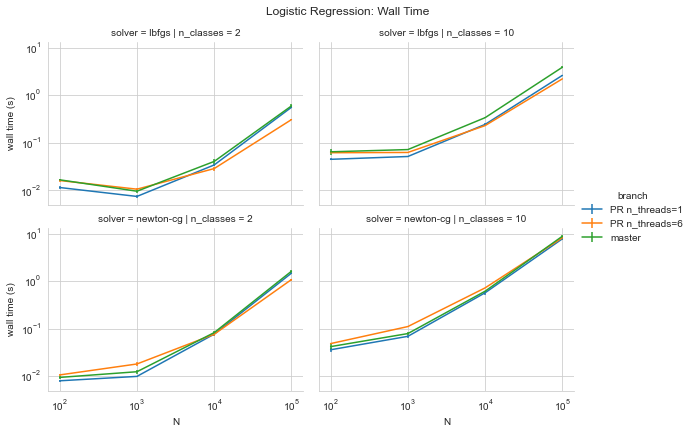

In [3]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: CPU Time')

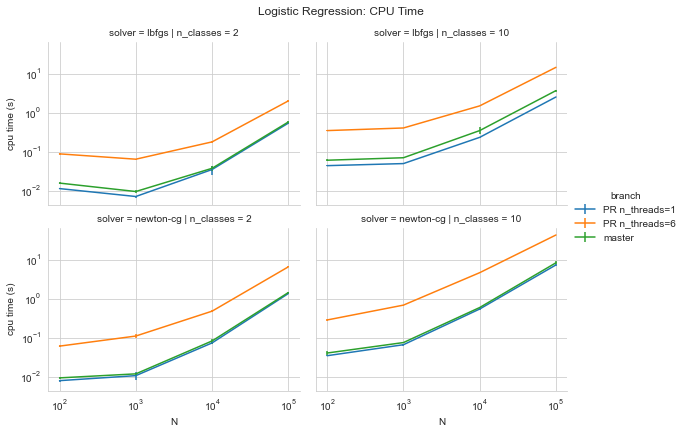

In [4]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: Peak Memory')

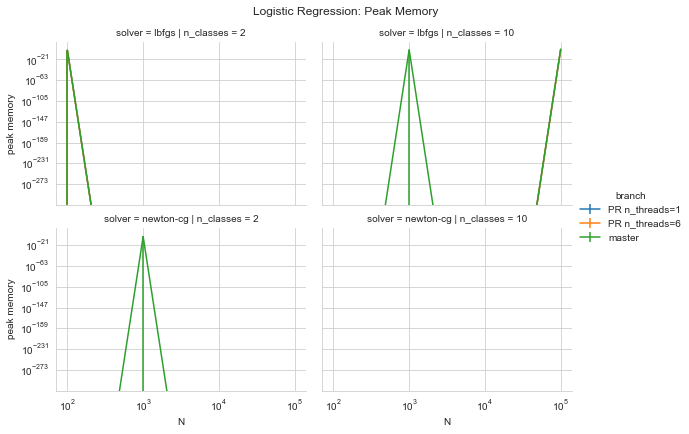

In [5]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Peak Memory", fontsize=12)

Error propagation: $\sigma^2(x/y) \approx \left(\frac{\partial}{\partial x}\frac{x}{y}\right)^2 \sigma_x^2 + \left(\frac{\partial}{\partial y}\frac{x}{y}\right)^2 \sigma_y^2
= \frac{1}{y^2} \sigma_x^2 + \frac{x^2}{y^4} \sigma_y^2 $

In [6]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "solver", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "solver", "n_classes", "branch", "mean", "std"]]
df_plot.head()

,N,solver,n_classes,branch,mean,std
0,100,lbfgs,2,PR n_threads=1,0.688741,0.067066
1,100,lbfgs,2,PR n_threads=6,0.966700,0.090805
2,100,lbfgs,2,master,1.000000,0.074459
3,100,newton-cg,2,PR n_threads=1,0.849085,0.077504
4,100,newton-cg,2,PR n_threads=6,1.128017,0.103934


In [7]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR n_threads=1", 'N'] *= 0.95
df_plot.loc[df_plot["branch"] == "PR n_threads=6", 'N'] *= 1.05

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master')

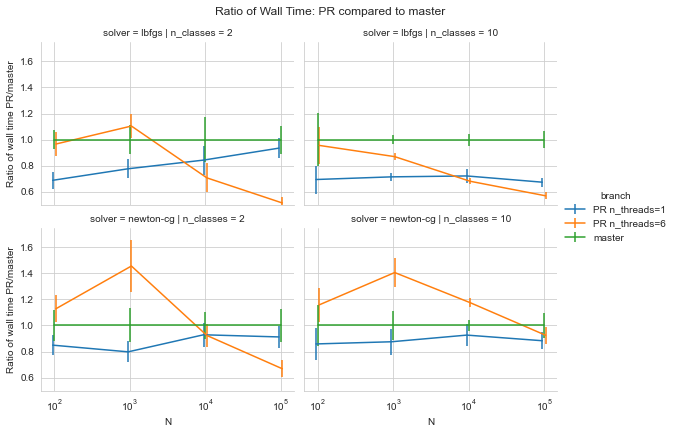

In [8]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.75))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")

## 2. HistGradientBoostingClassifier <a name="chapter_2"></a>
[back to TOC](#toc)

Based on PR https://github.com/scikit-learn/scikit-learn/pull/20811.

`n_features = 20`

## 2.1. Threads = 6

In [9]:
df = pd.concat([df_HGBT_PR_Threads_6, df_HGBT_MASTER_Threads_6])
df = df.set_index(["n_classes", "branch"], append=True)
df

wall_time                       \
                                             mean        max       std   
N      early_stopping n_classes branch                                   
100    False          2         PR       0.037085   0.043328  0.002229   
       True           2         PR       0.039516   0.065728  0.006447   
1000   False          2         PR       0.253804   0.305736  0.014140   
       True           2         PR       0.251614   0.328442  0.020887   
10000  False          2         PR       0.438835   0.505236  0.029141   
       True           2         PR       0.435423   0.505080  0.029021   
100000 False          2         PR       1.132529   1.194853  0.026518   
       True           2         PR       1.162725   1.427822  0.101187   
100    False          10        PR       0.320454   0.334653  0.004906   
       True           10        PR       0.343166   0.350848  0.005292   
1000   False          10        PR       2.411762   2.453070  0.018862   
       True           10        PR       2.338485   2.372132  0.019645   
10000  False          10        PR       3.868887   3.930171  0.025708   
       True           10        PR       3.890884   3.930602  0.021343   
100000 False          10        PR       8.138720   8.249455  0.049404   
       True           10        PR       8.160224   8.194849  0.024039   
100    False          2         master   0.037933   0.053592  0.005613   
       True           2         master   0.040638   0.056578  0.006620   
1000   False          2         master   0.257717   0.317782  0.018787   
       True           2         master   0.259135   0.314959  0.024228   
10000  False          2         master   0.455547   0.697382  0.074326   
       True           2         master   0.448422   0.646976  0.059024   
100000 False          2         master   1.573252   1.829623  0.147564   
       True           2         master   1.491191   1.840238  0.128676   
100    False          10        master   0.364588   0.537311  0.068994   
       True           10        master   0.356034   0.415806  0.026588   
1000   False          10        master   2.518387   2.911869  0.173326   
       True           10        master   2.524870   3.423296  0.308155   
10000  False          10        master   4.158435   5.417216  0.409158   
       True           10        master   4.143830   4.615046  0.279782   
100000 False          10        master  10.947632  12.459430  0.533207   
       True           10        master  11.149556  14.338423  0.890151   

                                         cpu_time                       \
                                             mean        max       std   
N      early_stopping n_classes branch                                   
100    False          2         PR       0.221091   0.270022  0.014249   
       True           2         PR       0.231298   0.287230  0.015130   
1000   False          2         PR       1.560901   1.836629  0.085864   
       True           2         PR       1.474450   1.606386  0.058621   
10000  False          2         PR       2.546535   3.183106  0.180832   
       True           2         PR       2.510999   2.780336  0.106299   
100000 False          2         PR       6.333931   6.755155  0.183171   
       True           2         PR       6.326856   7.062226  0.228291   
100    False          10        PR       1.930222   2.028571  0.037142   
       True           10        PR       2.023904   2.105699  0.033409   
1000   False          10        PR      14.360324  14.546429  0.092575   
       True           10        PR      14.544945  14.830027  0.145205   
10000  False          10        PR      22.105674  23.210202  0.301927   
       True           10        PR      21.742096  21.888206  0.091472   
100000 False          10        PR      45.858575  46.167392  0.184978   
       True           10        PR      45.933109  47.490457  0.392759   
100    False          2         master   0.

Text(0.5, 0.98, 'Histogram Gradient Boosting: Wall Time')

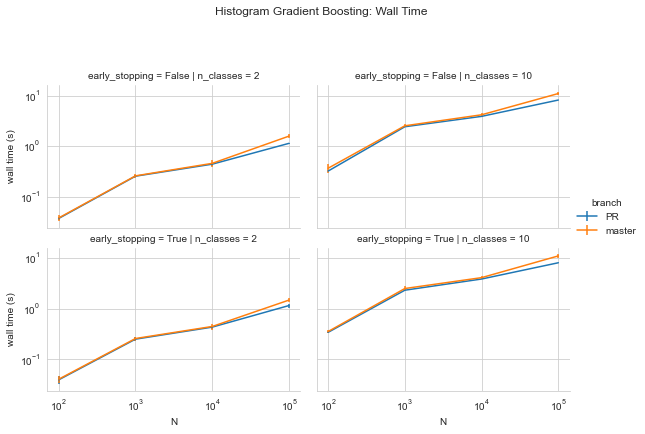

In [10]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: CPU Time')

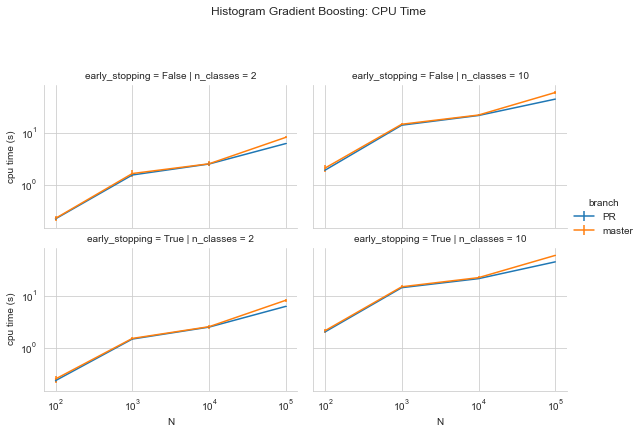

In [11]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: Peak Memory')

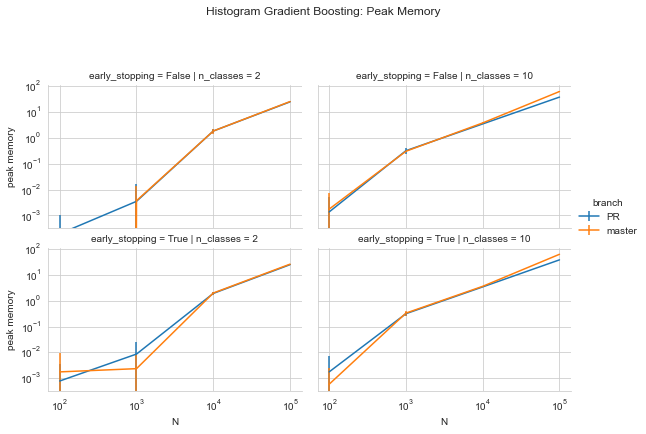

In [12]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Peak Memory", fontsize=12)

In [13]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "n_classes", "early_stopping"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "n_classes", "early_stopping", "branch", "mean", "std"]]
df_plot.head()

,N,n_classes,early_stopping,branch,mean,std
0,100,2,False,PR,0.977658,0.156144
1,100,2,False,master,1.000000,0.209262
2,100,2,True,PR,0.972371,0.224186
3,100,2,True,master,1.000000,0.230380
4,1000,2,False,PR,0.984818,0.090354


In [14]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR", "N"] *= 0.95

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master, n_threads=6')

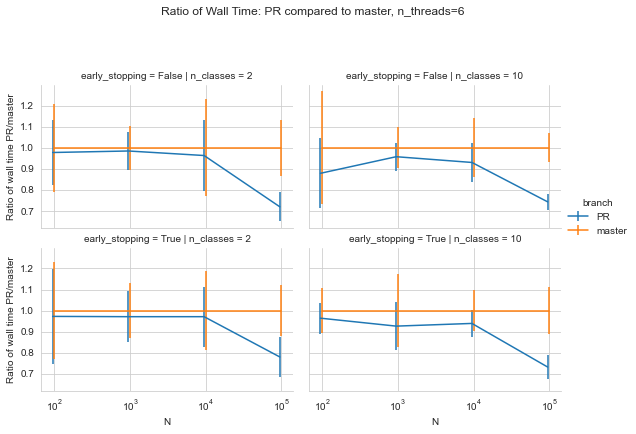

In [15]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
#g.set(ylim=(0.5, 1.5))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of Wall Time: PR compared to master, n_threads=6")

## 2.2. Threads = 1

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master, n_threads=1')

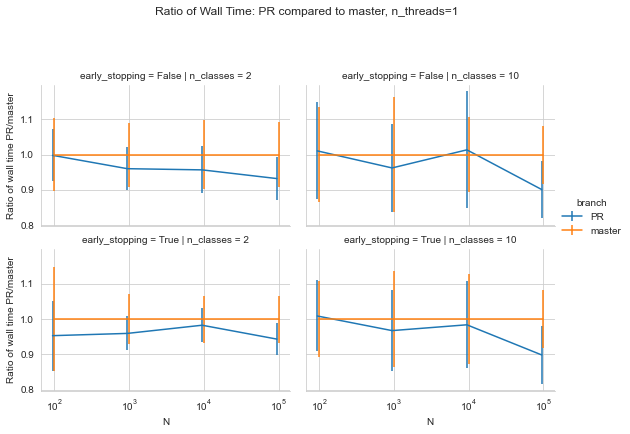

In [17]:
df = pd.concat([df_HGBT_PR_Threads_1, df_HGBT_MASTER_Threads_1])
df = df.set_index(["n_classes", "branch"], append=True)

df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "n_classes", "early_stopping"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "n_classes", "early_stopping", "branch", "mean", "std"]]

# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR", "N"] *= 0.95

g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="early_stopping", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
#g.set(ylim=(0.5, 1.5))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of Wall Time: PR compared to master, n_threads=1")